<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [1]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [2]:
using Test

include("../test/tester_pas_de_cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

afficher = true

@testset "Test Pas de Cauchy" begin
    tester_pas_de_cauchy(afficher,Pas_De_Cauchy)
end;

Test Summary:      | Pass  Total  Time
Test Pas de Cauchy |   11     11  1.1s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [3]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [4]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

include("Gradient_Conjugue_Tronque.jl") # pour ne pas afficher les erreurs dues au gct car on a décommenté les lignes de test du gct

afficher = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(afficher,Regions_De_Confiance)
end;

iters = 864
Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   30     30  2.4s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### Réponses

    Question 1.

La fonction $f_1$ est de la forme $f(x) = \frac{1}{2} x^T H x + g^T x + b$ et son gradient est de la forme $\nabla f(x) = Hx + g$.

La formule de Taylor à l'ordre 2 appliquée à f pour  $y \in \Re^3$ nous donne $f(x + y) = f(x) + \nabla f(x)^T y + \frac{1}{2} y^T \nabla ^2 f(x) y$.

Ainsi, $f(x + y) = f(x) + (Hx + g)^T y + \frac{1}{2} y^T H y$.

Ici, pour les fonctions quadratiques d'ordre 2, l'algorithme de Newton est plus adapté car comme on a vu précédemment, il permet de trouver le point minimal dès la première itération, alors que l'algorithme du pas de Cauchy permet de s'en rapprocher à la 32e itération par exemple avec x011 comme point initial.


In [5]:
include("../test/fonctions_de_tests.jl")
include("../src/Algorithme_De_Newton.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("  * sol_exacte : ", sol_exacte)
end

xmin,f_min,flag,nb_iters = Algorithme_De_Newton(fct1,grad_fct1,hess_fct1,x011,[])
my_afficher_resultats("Newton","f1",x011,xmin,f_min,flag,sol_exacte_fct1,nb_iters)

xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", fct1,grad_fct1,hess_fct1,x011,[])
my_afficher_resultats("Cauchy","f1",x011,xmin,f_min,flag,sol_exacte_fct1,nb_iters)


-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0, 1.0, 0.9999999999999999]
  * f(xsol) = 1.232595164407831e-32
  * nb_iters = 1
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Cauchy appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000072386475123, 0.999999018224437, 0.9999907978013619]
  * f(xsol) = 1.5250060967729277e-10
  * nb_iters = 32
  * flag = 2
  * sol_exacte : [1, 1, 1]


Autrement, l'algorithme du Pas de Cauchy est plus performant en général car il permet de considérer toutes les directions autour de x. Il permet de considérer tous les cas car on travaille dans un rayon $\delta_k$ autour de x, en étant proche de x, et pas seulement la direction du gradient. L'algorithme de Newton est moins efficace si le gradient coupe l'axe des abcisses en un point trop éloigné de la solution du problème de minimisation, il diverge.


    Question 2.

Pour améliorer les performances de l'algorithme, on peut jouer sur $\gamma_1$, $\gamma_2$, $\eta_1$, $\eta_2$, $\Delta_{max}$ et $max\_iter$. 

Tableau des tests pour f2 et x021 :

| $\gamma_1$ | $\gamma_2$ | $\eta_1$ | $\eta_2$ | nbiters | xsol |
| ---------- | ---------- | -------- |  ------- | ------- | ---- |
|0.5 | 2.00 | 0.25 | 0.75 | 3988 | [0.9975992881487654, 0.9951970760634036] |
|0.1 | 2.00 | 0.25 | 0.75 | 1809 | [0.9980294787896887, 0.9960656900170906] |
|0.5 | 3.00 | 0.25 | 0.75 | 4016 | [0.9975836964880894, 0.9951659468630973] | 
|0.5 | 2.00 | 0.60 | 0.75 | 1923 | [0.9978904652398627, 0.9957752199741595] |
|0.5 | 2.00 | 0.25 | 0.90 | 3985 | [0.9975992881487654, 0.9951970760634036] |

En effet, la mise à jour de $\delta_k$ dépend de $\gamma_1$ et $\gamma_2$, ces deux paramètres permettent de réduire ou d'augmenter la région de confiance avec le modèle de Taylor de 𝑓. Ainsi, si on diminue $\gamma_1$, on réduit la région de confiance et donc on arrive à une solution plus précise. (lignes 2-3 du tableau)

$\Delta_{max}$ permet aussi de jouer sur la région de confiance.

Et $\eta_1$ et $\eta_2$ permettent de déterminer si l'approximation de 𝑓 par sa série de Taylor est assez bonne ou non. Augmenter $\eta_1$ et/ou $\eta_2$ permet donc de converger plus vite car il faut moins d'itérations pour arriver à la valeur optimale. (lignes 4-5 du tableau)

En augmentant $max\_iter$, la solution est sera plus précise car on fait plus d'itérations.

In [6]:
	# La tolérance utilisée dans les tests
	tol_erreur = 1e-2
	# initialisation des variables de l'algorithme
	gamma1 = 0.5
	gamma2 = 2.00
	eta1 = 0.25
	eta2 = 0.75
	deltaMax = 10
	Tol_abs = sqrt(eps())
	Tol_rel = 1e-8
    epsilon = 1
	maxits = 5000
	delta0_1 = 2
	delta0_2 = 2

options1 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
options2 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_2,maxits,Tol_abs,Tol_rel,epsilon]

## Résultat de référence
x_min21, fmin21, flag21, nb_iters21 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
afficher_resultats("régions de confiance avec "*"Cauchy","fonction 2","x021",x_min21,fmin21, flag21,sol_exacte_fct1,nb_iters21)

## Influence des gamma
options_gamma =[deltaMax,0.1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
x_min21, fmin21, flag21, nb_iters21 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options_gamma)
afficher_resultats("régions de confiance avec "*"Cauchy","fonction 2","x021, en augmentant gamma1",x_min21,fmin21, flag21,sol_exacte_fct1,nb_iters21)

## Influence des eta
options_eta =[deltaMax,gamma1,gamma2,0.6,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
x_min21, fmin21, flag21, nb_iters21 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options_eta)
afficher_resultats("régions de confiance avec "*"Cauchy","fonction 2","x021, en augmentant eta1",x_min21,fmin21, flag21,sol_exacte_fct1,nb_iters21)


-------------------------------------------------------------------------
Résultats de : régions de confiance avec Cauchy appliqué à fonction 2 au point initial x021 :
  * xsol = [0.9975992881487654, 0.9951970760634036]
  * f(xsol) = 5.768693455998473e-6
  * nb_iters = 3988
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec Cauchy appliqué à fonction 2 au point initial x021, en augmentant gamma1 :
  * xsol = [0.9980294787896887, 0.9960656900170906]
  * f(xsol) = 3.883765796120765e-6
  * nb_iters = 1809
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec Cauchy appliqué à fonction 2 au point initial x021, en augmentant eta1 :
  * xsol = [0.9978904652398627, 0.9957752199741595]
  * f(xsol) = 4.460460769768015e-6
  * nb_iters = 1923
  * flag = 2
  * sol_exacte : [1, 1, 1]


# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [7]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [8]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  0.2s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [9]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864
Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  1.2s


## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

### Réponses

    Question 1.
    
A. Pour une itération, la décroissance correspond à l'évolution de $\rho_k$. On décide de tracer le numérateur de $\rho_k$, cela suffit pour donner une idée de l'évolutionde $\rho_k$. Or le numérateur dépend de $\delta_k$ donc on peut jouer sur ce paramètre pour regarder les résultats.

Ainsi, on obtient des résultats équivalents pour la fonction f1 avec les deux algorithmes et pour f2, le Pas de Cauchy permet d'obtenir un résultat plus précis que le Gradient conjugué tronqué.


[8.532423208191126, 146.5637187323805, 19.63221788549697, 803677.8552526012, 0.04937499999548001][9.0, 197.72, 19.468115674733383, 846282.988264899, 0.0]

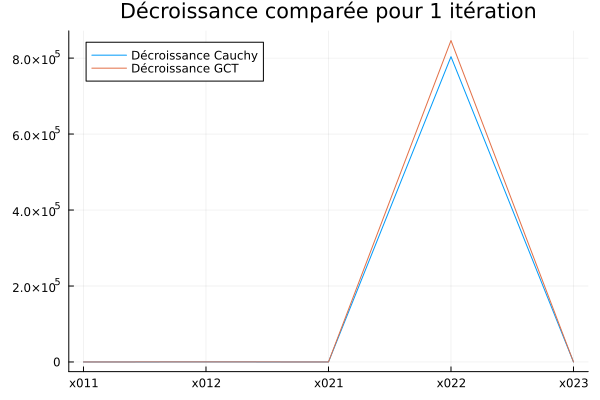

In [10]:
using Plots

	# La tolérance utilisée dans les tests
	tol_erreur = 1e-2
	# initialisation des variables de l'algorithme
	gamma1 = 0.5
	gamma2 = 2.00
	eta1 = 0.25
	eta2 = 0.75
	deltaMax = 10
	Tol_abs = sqrt(eps())
	Tol_rel = 1e-8
    epsilon = 1
	maxits = 5000
	delta0_1 = 2
	delta0_2 = 2

options1_it =[deltaMax,gamma1,gamma2,eta1,eta2,10,1,Tol_abs,Tol_rel,epsilon]
options2_it =[deltaMax,gamma1,gamma2,eta1,eta2,10,1,Tol_abs,Tol_rel,epsilon]


x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options1_it)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options1_it)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options2_it)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x022,options2_it)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options2_it)

cauchy = [(fct1(pts1.x011) - fmin11), (fct1(pts1.x012) - fmin12), (fct2(pts1.x021) - fmin21), (fct2(pts1.x022) - fmin22), (fct2(pts1.x023) - fmin23)]
print(cauchy)

x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options1_it)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options1_it)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,options2_it)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x022,options2_it)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options2_it)

gct = [(fct1(pts1.x011) - fmin11), (fct1(pts1.x012) - fmin12), (fct2(pts1.x021) - fmin21), (fct2(pts1.x022) - fmin22), (fct2(pts1.x023) - fmin23)]
print(gct)

plot(["x011","x012","x021","x022","x023"], [cauchy, gct], title="Décroissance comparée pour 1 itération", label=["Décroissance Cauchy" "Décroissance GCT"])
plot!(legend=:topleft)


In [11]:
options_maxit =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,1,Tol_abs,Tol_rel,epsilon]



10-element Vector{Float64}:
 10.0
  0.5
  2.0
  0.25
  0.75
  2.0
  1.0
  1.4901161193847656e-8
  1.0e-8
  1.0

B. Dans le cas général, la décroissance est toujours beaucoup plus rapide avec le gradient conjugué tronqué.  La différence est de l'ordre de 10 à quasiment 170 fois plus efficace.

ex : pour f1 et x012, il faut 28 itérations avec Cauchy pour s'approcher de la solution exacte contre seulement 3 pour GCT qui trouve exactement la solution. 
Idem pour f2 et x023 où GCT trouve en 19 itérations une meilleure solution que Cauchy en 3198...



In [12]:
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
afficher_resultats("régions de confiance avec "*"cauchy","fonction 1","x012",x_min12,fmin12, flag12,sol_exacte_fct1,nb_iters12)

x_min12, fmin12, flag12, nb_iters12 = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
afficher_resultats("régions de confiance avec "*"gct","fonction 1","x012",x_min12,fmin12, flag12,sol_exacte_fct1,nb_iters12)

x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options2)
afficher_resultats("régions de confiance avec "*"cauchy","fonction 2","x023",x_min23,fmin23, flag23,sol_exacte_fct2,nb_iters23)
    
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options2)
afficher_resultats("régions de confiance avec "*"gct ","fonction 2","x023",x_min23,fmin23, flag23,sol_exacte_fct2,nb_iters23)


-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x012 :
  * xsol = [1.000049795462743, 0.9999961002424803, 0.9999424049876057]
  * f(xsol) = 6.0401046516733e-9
  * nb_iters = 28
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 1 au point initial x012 :
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 3
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x023 :
  * xsol = [0.998024983312937, 0.9960352320641266]
  * f(xsol) = 3.935418178353333e-6
  * nb_iters = 3198
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : rég

Nous traçons le graphique suivant pour montrer que la décroissance est beaucoup plus forte pour le Gradient Conjugué Tronqué que pour le Pas de Cauchy.



[26, 28, 3988, 864, 3198][1, 3, 31, 44, 19]

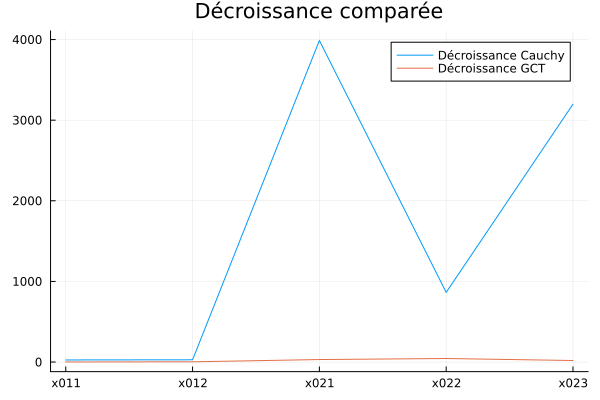

In [13]:
using Plots 

x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

cauchy = [nb_iters11, nb_iters12, nb_iters21, nb_iters22, nb_iters23]
print(cauchy)

x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

gct = [nb_iters11, nb_iters12, nb_iters21, nb_iters22, nb_iters23]
print(gct)

plot(["x011","x012","x021","x022","x023"], [cauchy, gct], title="Décroissance comparée", label=["Décroissance Cauchy" "Décroissance GCT"])
plot!(legend=:topright)




    Question 2.
    
La méthode du Gradient Conjugué Tronqué est bien plus performante car il converge beaucoup plus vite, ce qui est très efficace quand les gradients et les hessiennes sont lourdes à calculer. Il renvoit une solution plus proche de la solution exacte que celle renvoyée par Cauchy en beaucoup moins d'itérations.

Quant à l'algorithme du Pas de Cauchy, il est plus simple à programmer et le calcul est direct donc il est plus efficace en temps de calcul mais la solution est moins précise et il faut donc faire plus d'itérations.

Au final, si on fait peu d'itérations, le Pas de Cauchy suffit et peut même renvoyer une solution plus précise.
Mais si on fait beaucoup d'itérations, le Gradient conjugué permet d'obtenir une meilleure solution, en moins d'itération que le Pas de Cauchy. 